<a href="https://colab.research.google.com/github/kushalkmrd/food_safety_abm/blob/main/model_v3_may_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Safety Agent based model

### Last edited by Kushal on 2024-06-05





In [1]:
# install and load required libraries 
#!pip install numpy pandas matplotlib seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


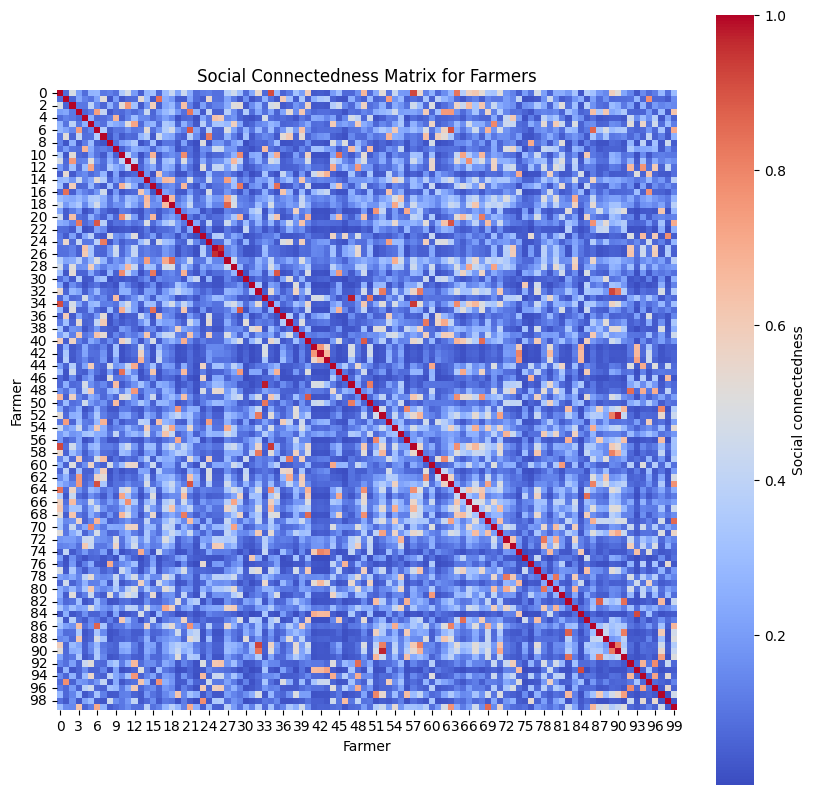

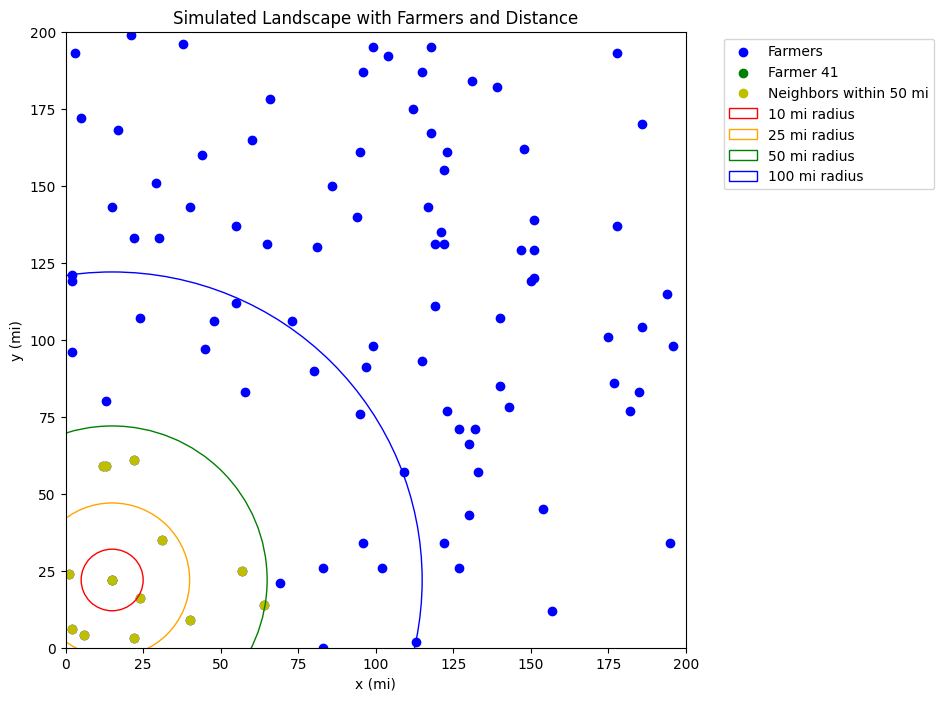

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
n_farmers = 100
landscape_size = 200

# Generate farmer locations
farmer_locations = np.random.randint(0, landscape_size, size=(n_farmers, 2))

# Compute distances between farmers
distances = np.zeros((n_farmers, n_farmers))
for i in range(n_farmers):
    for j in range(n_farmers):
        distances[i, j] = np.sqrt((farmer_locations[i, 0] - farmer_locations[j, 0])**2 + (farmer_locations[i, 1] - farmer_locations[j, 1])**2)

# Create the social connectedness matrix
social_connectedness = np.exp(-distances / 50)

# Plot the social connectedness matrix as a heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(social_connectedness, ax=ax, cmap="coolwarm", square=True, cbar_kws={"label": "Social connectedness"})
ax.set_xlabel("Farmer")
ax.set_ylabel("Farmer")
ax.set_title("Social Connectedness Matrix for Farmers")
plt.show()

# Plot the landscape with farmers and the elevator
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(farmer_locations[:, 0], farmer_locations[:, 1], c="b", label="Farmers")

# Highlight an example farmer (farmer 41) and their neighbors within a 50 mi radius
example_farmer = 42
radius = 50
neighbors = np.where(distances[example_farmer] <= radius)[0]
ax.scatter(farmer_locations[example_farmer, 0], farmer_locations[example_farmer, 1], c="g", label="Farmer 41")
ax.scatter(farmer_locations[neighbors, 0], farmer_locations[neighbors, 1], c="y", label="Neighbors within 50 mi")

# Add circles around the example farmer with radii of 10, 25, 50, and 100 miles
radii = [10, 25, 50, 100]
colors = ["red", "orange", "green", "blue"]
for r, c in zip(radii, colors):
    circle = plt.Circle((farmer_locations[example_farmer, 0], farmer_locations[example_farmer, 1]), r, color=c, fill=False, label=f"{r} mi radius")
    ax.add_artist(circle)

ax.set_xlim(0, landscape_size)
ax.set_ylim(0, landscape_size)
ax.set_xlabel("x (mi)")
ax.set_ylabel("y (mi)")
ax.set_title("Simulated Landscape with Farmers and Distance")
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()



In [ ]:
!pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip


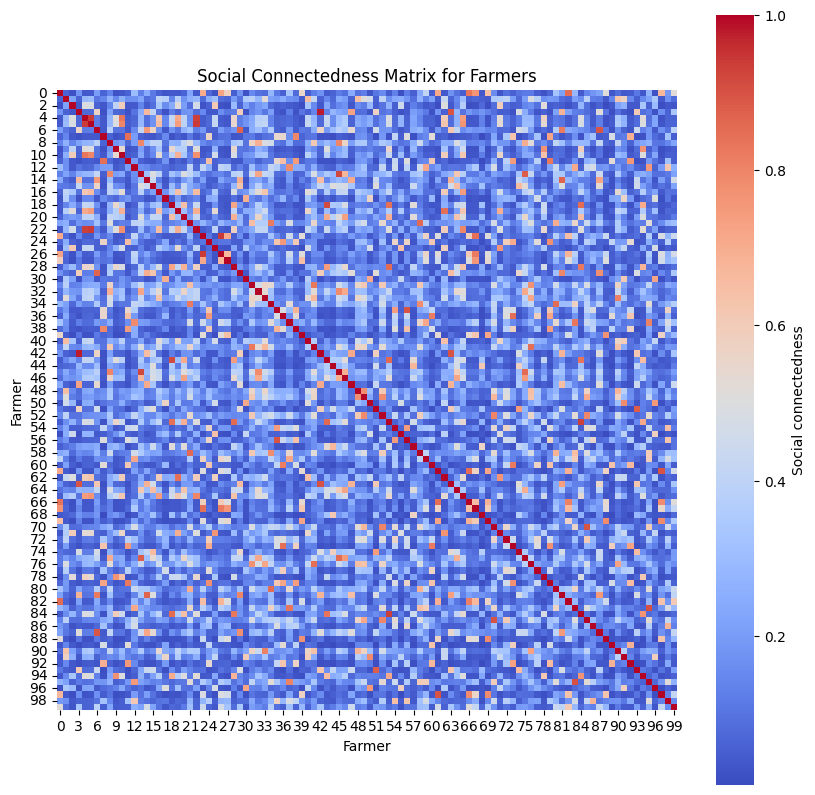

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
n_farmers = 100
landscape_size = 200

# Generate farmer locations
farmer_locations = np.random.randint(0, landscape_size, size=(n_farmers, 2))

# Compute distances between farmers
distances = np.zeros((n_farmers, n_farmers))
for i in range(n_farmers):
    for j in range(n_farmers):
        distances[i, j] = np.sqrt((farmer_locations[i, 0] - farmer_locations[j, 0])**2 + (farmer_locations[i, 1] - farmer_locations[j, 1])**2)

# Create the social connectedness matrix
social_connectedness = np.exp(-distances / 50)

# Plot the social connectedness matrix as a heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(social_connectedness, ax=ax, cmap="coolwarm", square=True, cbar_kws={"label": "Social connectedness"})
ax.set_xlabel("Farmer")
ax.set_ylabel("Farmer")
ax.set_title("Social Connectedness Matrix for Farmers")
plt.show()


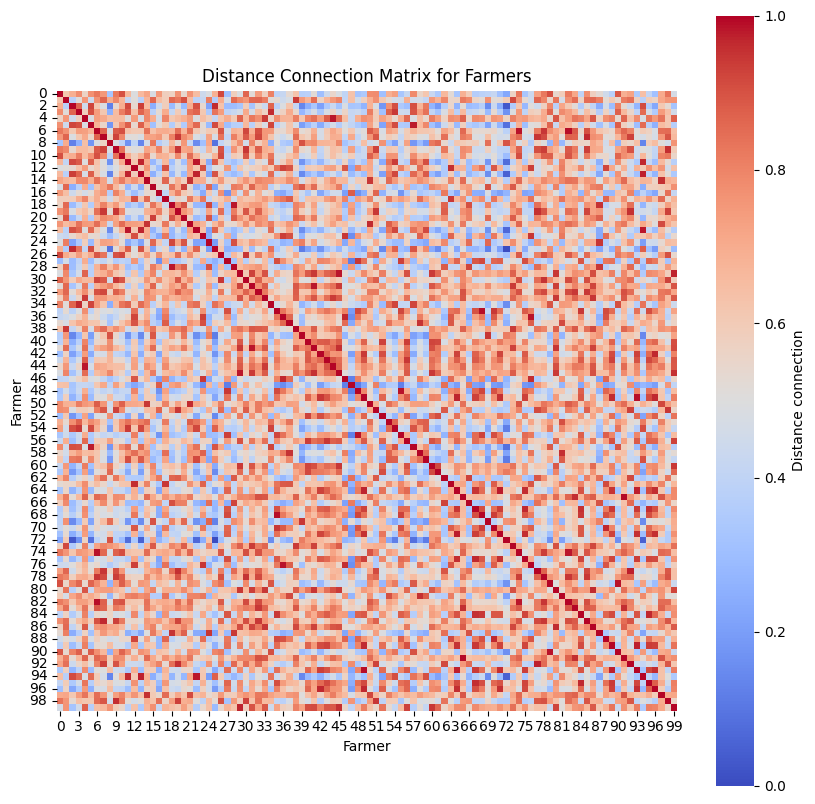

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
n_farmers = 100
landscape_size = 200

# Generate farmer locations
farmer_locations = np.random.randint(0, landscape_size, size=(n_farmers, 2))

# Compute distances between farmers
distances = np.zeros((n_farmers, n_farmers))
for i in range(n_farmers):
    for j in range(n_farmers):
        distances[i, j] = np.sqrt((farmer_locations[i, 0] - farmer_locations[j, 0])**2 + (farmer_locations[i, 1] - farmer_locations[j, 1])**2)

# Normalize distances (0 to 1)
normalized_distances = 1 - (distances - np.min(distances)) / (np.max(distances) - np.min(distances))

# Plot the normalized distance connection matrix as a heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(normalized_distances, ax=ax, cmap="coolwarm", square=True, cbar_kws={"label": "Distance connection"})
ax.set_xlabel("Farmer")
ax.set_ylabel("Farmer")
ax.set_title("Distance Connection Matrix for Farmers")
plt.show()


In [ ]:
import numpy as np
import pandas as pd

class Farm:
    def __init__(self, c, k):
        self.c = c
        self.k = k
        self.alpha = None
        self.J = None

    def calculate_contamination_rate(self, T):
        self.alpha = np.exp(-self.c * T * self.k)
        return self.alpha

    def calculate_cost_function(self, f, beta, P, c_e, c_k):
        self.J = sum([f[i] * self.alpha * np.prod(beta[:i+1]) + f[i+1] * self.alpha * np.prod(1 - beta[:i+1]) * beta[i+1] for i in range(4)])
        self.J += f[5] * self.alpha * np.prod(1 - beta) * P + c_e + c_k
        return self.J

    def update_risk_control_effort(self, D1, D2, h, delta, T, lambda_1, lambda_2, lambda_3):
        self.c = self.c + lambda_1 * D1 + lambda_2 * D2 + lambda_3 * (D2 - h) + delta * T

    def update_risk_control_technology(self, D1, D2, D3, T, omega_1, omega_2, omega_3):
        self.k = self.k + omega_1 * D1 + omega_2 * D2 + omega_3 * D3 * T

In [ ]:
import numpy as np

# Class to store parameters and initial conditions
class Parameters(object):
    def __init__(self) -> None:
        # Parameters for testing regime
        self.f_test_range = np.arange(0.4, 0.4, 0.1)
        self.p_test_range = np.arange(0.1, 0.4, 0.1)
        self.d_test_range = np.arange(0.0001, 0.0002, 0.0001)
        self.r_test_range = np.arange(0.0001, 0.0002, 0.0001)

        # Parameters for Farmer Behavior
        [beta1,beta2,beta3,beta4] = np.around(np.random.uniform(low=0.01, high=0.2, size=(4,)),4)
        [f1,f2,f3,f4] = np.random.rand(4)
        self.beta1 = beta1
        self.beta2 = beta2
        self.beta3 = beta3
        self.beta4 = beta4
        self.f1 = f1
        self.f2 = f2
        self.f3 = f3
        self.f4 = f4

        # Population
        self.farm_population = 1
        self.packer_population = 1
        self.distributor_population = 1
        self.retailer_population = 1
        self.customer_population = 5000

        # Size of plot, box, and farm
        self.plot_per_farm = 1856
        self.box_per_P = 31562
        self.box_per_D = 31562
        self.box_per_R = 31562

        self.box_per_plot = 17
        self.contamination_rate = 0.06

        self.d_test_rate = 0.0
        self.r_test_rate = 0.0

        # Initialising some lists
        self.box_ids_l=[]
        self.box_ids_C_l=[]
        self.dropped_boxes_F_l=[]
        self.dropped_boxes_P_l=[]
        self.dropped_boxes_D_l=[]
        self.dropped_boxes_R_l=[]
        self.dropped_boxes_C_l=[]
        self.detection_percent_l=[]

        self.iterations = 10

        # Test cost at each stage
        self.test_cost_F = 5
        self.test_cost_P = 50
        self.test_cost_D = 50
        self.test_cost_R = 50

        # Customer demand
        self.box_cap = 50
        self.number_plot = self.farm_population * self.plot_per_farm
        self.number_box = self.number_plot * self.box_per_plot
        self.customer_number = int(self.number_box * self.box_cap * (0.80 - self.contamination_rate))
        self.customer_demand = np.floor(np.abs(np.random.normal(1, 2, (self.customer_number, 1))))

        # Customer illness cost
        self.ill_rate = 0.04
        self.hospital_rate = 0.0164
        self.death_rate = 0.000041
        self.ill_compensation = 719
        self.hospital_compensation = 18438
        self.death_compensation = 1764112

        # Recall and Trace cost
        self.unit_recall_labor_cost = 10
        self.unit_trace_labor_cost = 10
        self.price_per_box = 100

        # Transportation cost
        self.unit_trans_cost = 0.007
        self.cost_indicator = 1
        self.F_P_distance = 5
        self.P_D_distance = 2983
        self.D_R_distance = 11


100%|██████████| 4/4 [00:00<00:00, 174.24it/s]


<Axes: >

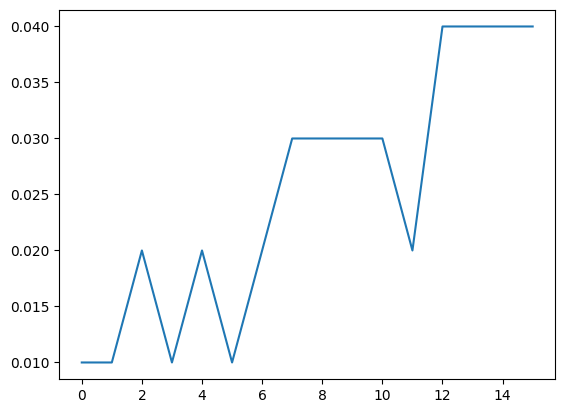

In [ ]:
# Set parameters for simulation
farm_population = 1
packer_population = 1
distributor_population = 1
retailer_population = 1
customer_population = 5000

plot_per_farm = 1856
box_per_P = 31562
box_per_D = 31562
box_per_R = 31562

box_per_plot = 17
contamination_rate = 0.06

d_test_rate = 0.0
r_test_rate = 0.0

box_ids_l=[]
box_ids_C_l=[]
dropped_boxes_F_l=[]
dropped_boxes_P_l=[]
dropped_boxes_D_l=[]
dropped_boxes_R_l=[]
dropped_boxes_C_l=[]
detection_percent_l=[]
iterations = 10

# Test cost at each stage
test_cost_F = 350
test_cost_P = 50
test_cost_D = 50
test_cost_R = 50

# Customer demand
box_cap = 50
number_plot = farm_population * plot_per_farm
number_box = number_plot * box_per_plot
customer_number = int (number_box * box_cap * (0.80 - contamination_rate))
customer_demand = np.floor(np.abs(np.random.normal(1, 2, (customer_number, 1))))


# Customer illness cost
ill_rate = 0.04
hospital_rate = 0.0164
death_rate = 0.000041
ill_compensation = 719
hospital_compensation = 18438
death_compensation = 1764112

# Recall and Trace cost
unit_recall_labor_cost = 10
unit_trace_labor_cost = 10
price_per_box = 100

# Transportation cost
unit_trans_cost = 0.007
cost_indicator = 1
F_P_distance = 5
P_D_distance = 2983
D_R_distance = 11

# Define functions

# generate box id
#@nb.njit(nopython=True)
def generate_box_id(farm_idx, plot_idx, box_idx):
    return farm_idx * 10000000000 + plot_idx * 100000 + box_idx * 10

# generate contaminated box mask
#@nb.njit(parallel=True)
def generate_contamination_mask(total_boxes, contamination_rate):
    contaminated_boxes = int(total_boxes * contamination_rate)
    mask = np.zeros(total_boxes, dtype=np.bool_)
    mask[:contaminated_boxes] = True
    np.random.shuffle(mask)
    return mask
def generate_contamination_mask(total_boxes, contamination_rate):
    contaminated_boxes = int(total_boxes * contamination_rate)
    mask = np.zeros(total_boxes, dtype=np.bool_)
    mask[:contaminated_boxes] = True
    np.random.shuffle(mask)
    return mask


def generate_box_ids_numpy(farm_population, plot_per_farm, box_per_plot):
    farm_range = np.arange(1, farm_population + 1)
    plot_range = np.arange(1, plot_per_farm + 1)
    box_range = np.arange(1, box_per_plot + 1)
    farm_grid, plot_grid, box_grid = np.meshgrid(farm_range, plot_range, box_range)
    return (farm_grid * 10000000000 + plot_grid * 100000 + box_grid).ravel()

# define testing at each stage

'''
# Only contaminated tested boxes are dropped
def run_stage(box_ids, contamination_mask, test_rate):
    tested_boxes_mask = np.random.rand(box_ids.shape[0]) < test_rate
    tested_contaminated_boxes = box_ids[np.logical_and(contamination_mask, tested_boxes_mask)]
    if tested_contaminated_boxes.size > 0:
        mask = np.isin(box_ids, tested_contaminated_boxes)
        box_ids_n = box_ids[~mask]
        contamination_mask = contamination_mask[~mask]
        dropped_boxes = set(tested_contaminated_boxes)
    else:
        box_ids_n = box_ids
        dropped_boxes = set()
    remaining_boxes = box_ids_n[~np.isin(box_ids_n, tested_contaminated_boxes)]
    return remaining_boxes, contamination_mask, dropped_boxes'''
# All boxes in same plot in which tested contaminated box is found are dropped
def run_stage(box_ids, contamination_mask, test_rate,box_per_plot):
    tested_boxes_mask = np.random.rand(box_ids.shape[0]) < test_rate
    #tested_contaminated_boxes = box_ids[np.logical_and(contamination_mask, tested_boxes_mask)]
    tested_contaminated_boxes = box_ids[np.logical_and(contamination_mask, tested_boxes_mask)]
    if tested_contaminated_boxes.size > 0:
        plot_farm_ids_tested = tested_contaminated_boxes - tested_contaminated_boxes % 100
        #plot_farm_ids_all = box_ids - box_ids % 100
        tested_contaminated_boxes_all=np.repeat(np.unique(plot_farm_ids_tested),box_per_plot)+ np.tile(np.arange(1, box_per_plot + 1),np.unique(plot_farm_ids_tested).shape[0])
        #plot_boxes = np.array([generate_box_id(farm_idxs[i], plot_idxs[i], box_idx) for i in range(tested_contaminated_boxes.size) for box_idx in range(1, box_per_plot+1)])
        #remaining_boxes = box_ids[~np.isin(box_ids, dropped_boxes)]
        #tested_contaminated_boxes= np.array(list(dropped_boxes))
        dropped_boxes = set(np.unique(tested_contaminated_boxes_all))
        mask = np.isin(box_ids, tested_contaminated_boxes_all)
        contamination_mask = contamination_mask[~mask]
        box_ids_n = box_ids[~mask]
        #dropped_boxes = set(tested_contaminated_boxes)
    else:
        dropped_boxes = set()
        box_ids_n = box_ids
    remaining_boxes = box_ids_n

    return remaining_boxes, contamination_mask, dropped_boxes, sum(tested_boxes_mask)
# Cost Calculation

# Transportation cost
def transportation_cost(box_ids_F_P,box_ids_P_D,box_ids_D_R):
    trans_cost_F_P = (len(box_ids_F_P) // box_per_P +1 )* F_P_distance * unit_trans_cost
    trans_cost_P_D = (len(box_ids_P_D) // box_per_D +1 )* P_D_distance * unit_trans_cost
    trans_cost_D_R = (len(box_ids_D_R) // box_per_R + 1) * D_R_distance * unit_trans_cost
    return trans_cost_D_R+trans_cost_P_D+trans_cost_F_P

def testing_cost(tests_F,tests_P,tests_D,tests_R):
    return tests_F*test_cost_F+tests_P*test_cost_P+tests_D*test_cost_D+tests_R*test_cost_R

# Customer consumption and illness report
def customer_illness_cost(box_ids_R_C,contamination_mask):
    #boxes_allotted = np.zeros((customer_number,2),dtype=int)
    all_boxes= box_ids_R_C
    boxes_allotted_cont = np.zeros(customer_number,dtype=bool)
    current_box_cap = box_cap
    current_box_id = 0
    current_box_contaminated = contamination_mask[current_box_id]
    contaminated=sum(contamination_mask)
    #customer_demand = np.sort(customer_demand)[::-1]
    if contaminated:
        for i, current_customer_demand in enumerate(customer_demand):
            if current_customer_demand == 0:
                continue
            else:
                if current_box_cap - current_customer_demand >= 0:
                    #boxes_allotted[i,0]=all_boxes[current_box_id]
                    current_box_cap -= current_customer_demand
                    boxes_allotted_cont[i]=current_box_contaminated
                    if current_box_cap == 0:
                        current_box_id += 1
                        if current_box_id < len(all_boxes):
                            current_box_contaminated = contamination_mask[current_box_id]
                        else:
                            current_box_contaminated = False
                        current_box_cap = box_cap
                else:
                    #boxes_allotted[i,0]=all_boxes[current_box_id]
                    current_box_id += 1
                    if current_box_id < len(all_boxes):
                        cont= contamination_mask[current_box_id]
                    else:
                        cont=current_box_contaminated
                    current_box_cap = box_cap - current_customer_demand - current_box_cap
                    boxes_allotted_cont[i]=cont+current_box_contaminated
                    current_box_contaminated = cont
                    #boxes_allotted[i,1]=all_boxes[current_box_id]
        customers_contaminated = sum(boxes_allotted_cont)
    else:
        customers_contaminated = 0

    ill_number = np.random.rand(customers_contaminated, 1)
    hospital_number = np.random.rand(customers_contaminated, 1)
    death_number = np.random.rand(customers_contaminated, 1)

    death_number = death_number < death_rate
    death_case_number = np.sum(death_number)

    hospital_number = hospital_number < hospital_rate
    hospital_case_number = np.sum(hospital_number)

    ill_number = ill_number < ill_rate
    ill_case_number = np.sum(ill_number)
    cust_cost = death_case_number * death_compensation + hospital_case_number * hospital_compensation + ill_case_number * ill_compensation
    return cust_cost

def recall_cost(contamination_mask):
    return sum(contamination_mask)* (unit_recall_labor_cost+unit_trace_labor_cost+price_per_box)


# Function to check if a value is in an array
#@nb.njit(parallel=True)
def isin(a, b):
    out=np.empty(a.shape[0], dtype=nb.boolean)
    b = set(b)
    for i in nb.prange(a.shape[0]):
        out[i] = a[i] in b
    return out


# Run testing and return the number of boxes dropped at each stage
def run_test():
    total_boxes = farm_population * plot_per_farm * box_per_plot
    box_ids = generate_box_ids_numpy(farm_population, plot_per_farm, box_per_plot)
    contamination_mask = generate_contamination_mask(total_boxes, contamination_rate)
    box_ids_F_P, contamination_mask1, dropped_boxes_F,tests_F = run_stage(box_ids, contamination_mask, f_test_rate,box_per_plot)
    box_ids_P_D, contamination_mask2, dropped_boxes_P,tests_P = run_stage(box_ids_F_P, contamination_mask1, p_test_rate,box_per_plot)
    box_ids_D_R, contamination_mask3, dropped_boxes_D,tests_D = run_stage(box_ids_P_D, contamination_mask2, d_test_rate,box_per_plot)
    box_ids_R_C, contamination_mask4, dropped_boxes_R,tests_R = run_stage(box_ids_D_R, contamination_mask3, r_test_rate,box_per_plot)
    return (
        transportation_cost(box_ids_F_P, box_ids_P_D, box_ids_D_R)
        + customer_illness_cost(box_ids_R_C, contamination_mask4)
        + testing_cost(tests_F, tests_P, tests_D, tests_R)
        + recall_cost(contamination_mask4)
    )

import matplotlib.pyplot as plt

import concurrent.futures

iterations = 1
ftest_rate = []
ptest_rate = []
costs_mean = []
costs_std = []
from tqdm import tqdm
def run_test_wrapper(f_test_rate, p_test_rate):
    costs = []
    for i in range(iterations):
        total_cost = run_test()
        costs.append(total_cost)
    return f_test_rate, p_test_rate, np.mean(costs), np.std(costs)

with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = []
    for f_test_rate in tqdm(np.arange(0.01,0.05,0.01)):
        for p_test_rate in np.arange(0.01,0.05,0.01):
            futures.append(executor.submit(run_test_wrapper, f_test_rate, p_test_rate))

    for future in concurrent.futures.as_completed(futures):
        f_test_rate, p_test_rate, cost_mean, cost_std = future.result()
        ftest_rate.append(f_test_rate)
        ptest_rate.append(p_test_rate)
        costs_mean.append(cost_mean)
        costs_std.append(cost_std)

import pandas as pd
pd.Series(ftest_rate).plot()

# Old Model


In [ ]:
import numpy as np
farm_population = 1
packer_population = 1
distributor_population = 1
retailor_population = 1
customer_population = 5

plot_per_farm = 1856
#box_per_packer = 31562
#box_per_distributor = 31562
#box_per_retailer = 31562

box_per_packer = 1000
box_per_distributor = 1000
box_per_retailer = 1000

box_per_plot = 17
box_per_farm = plot_per_farm * box_per_plot
box_cap = 50
contaminate_ratio = 0.06
iteration_limit = 1
iteration = 1

number_plot = plot_per_farm
number_box = number_plot * box_per_plot

history_box_id_f = []
history_box_id_d = []
history_box_id_f = [i * 10000 + j for i in range(1, farm_population + 1) for j in range(1, plot_per_farm + 1) for b in range(1, box_per_plot + 1)]
history_box_id_f = [history_box_id_f] * iteration_limit
history_box_id_d = history_box_id_f

history_box_id_cus = []
f_test_history_box_id_cusult = np.zeros((number_box, iteration_limit+1))
p_test_history_box_id_cusult = np.zeros((number_box, iteration_limit+1))
d_test_history_box_id_cusult =np.zeros((number_box, iteration_limit+1))
r_test_history_box_id_cusult = np.zeros((number_box, iteration_limit+1))

contaminate_drop = np.zeros((number_box, iteration_limit))


test_number = []
test_cost_f = 350
test_cost_p = 50
test_cost_d = 50
test_cost_r = 50

customer_number = np.floor(number_box * box_cap)

customer_demand = np.floor(np.random.normal(1, 2, size=(int(customer_number), 1)))
customer_demand = np.abs(customer_demand)

for i in range(len(customer_demand)):
    if customer_demand[i] == 0:
        customer_demand[i] = 1

ill_rate = 0.04
hospital_rate = 0.0164
death_rate = 0.000041
ill_compensation = 719
hospital_compensation = 18438
death_compensation = 1764112

unit_recall_labor_cost = 10
unit_trace_labor_cost = 10
price_per_box = 100

unit_trans_cost = 0.007
cost_indicator = 1
f_d_distance = 2983
d_r_distance = 11

cost = []
f_test_location = []
p_test_location = []
d_test_location = []
r_test_location = []
f_p_trans_cost = []
p_d_trans_cost = []
d_r_trans_cost = []
f_d_trans_cost = []

d_test_rate = 0
r_test_rate = 0



contaminate_b = np.zeros((number_box, iteration_limit+1))
f_test_history_box_id_cusult = np.zeros((number_plot, iteration_limit+1))
p_test_history_box_id_cusult = np.zeros((number_box, iteration_limit+1))


for f_test_rate in range(0, 5, 1):
    f_test_rate = f_test_rate/10
    for p_test_rate in range(25, 30, 1):
        p_test_rate = p_test_rate/100
        cost_ind = np.zeros((1, iteration_limit))
        iteration = 1
        while iteration <= iteration_limit:
        #for iteration in range(1, iteration_limit+1):

            # Initialize contaminate_drop
            contaminate_drop = np.zeros((number_box, iteration_limit))

            # Generate contaminate_p
            contaminate_p = np.random.rand(number_plot, 1)
            contaminate_p = contaminate_p < contaminate_ratio

            # Generate contaminate_b
            contaminate_b_tem = np.tile(contaminate_p, (1, box_per_plot)).T
            contaminate_b[:, iteration] = contaminate_b_tem.flatten()

            ################################
            ####### FIELD TEST #############
            ################################
            # generate random array for f_test_number with f_test_rate
            f_test_number = np.random.rand(number_plot, 1)
            f_test_number = f_test_number < f_test_rate
            # create f_test_history_box_id_cusult and f_test_location arrays
            f_test_history_box_id_cusult[:, iteration] = ((f_test_number == 1) & (contaminate_p == 1)).flatten()

            f_test_location = np.argwhere(np.logical_and(f_test_number == 1, contaminate_p == 1))

            # get size of f_test_location array
            f_test_location_size = f_test_location.shape[0]

            # calculate drop_plot_f array and update contaminate_drop array

            drop_plot_f = np.floor((f_test_location - 1) / box_per_plot) + 1
            contaminate_drop[(np.floor((np.arange(number_box) - 1) / box_per_plot) + 1) in drop_plot_f, iteration] = 1

            ''' drop_plot_f = np.floor((f_test_location - 1) / box_per_plot) + 1
            for i in range(number_box):
                for j in range(f_test_location_size):
                    if np.floor((i-1) / box_per_plot) + 1 == f_test_location[j]:
                        contaminate_drop[i, iteration] = 1
            '''
            # create f_to_p_box array
            f_to_p_box = contaminate_drop == 0
            ################################
            ####### PACKER TEST #############
            ################################

            p_test_number = np.random.rand(number_box, 1)
            p_test_number = p_test_number < p_test_rate

            #p_test_history_box_id_cusult[:, iteration] = np.logical_and((p_test_number.flatten() == 1), (contaminate_b[:, iteration].flatten() == 1))

            #p_test_location = np.argwhere((p_test_number == 1) & (contaminate_b[:, iteration] == 1) & (contaminate_drop[:, iteration] == 0))

            p_test_history_box_id_cusult[:, iteration] = ((p_test_number == 1) & (contaminate_b == 1)).flatten()
            #p_test_history_box_id_cusult[:, iteration] = ((p_test_number == 1) & (contaminate_b == 1)).flatten()

            #p_test_location = np.argwhere(p_test_number == 1 & contaminate_b[:, iteration] == 1 & contaminate_drop[:, iteration] == 0)

            p_test_number = np.logical_and(p_test_number, contaminate_drop[:, iteration] == 0)


            # how many boxes are tested in this process
            p_test_location_size = p_test_location.shape[0]

            # drop contaminate box in same plot
            drop_plot_p = np.floor((p_test_location - 1) / box_per_plot) + 1
            contaminate_drop[(np.floor((np.arange(number_box) - 1) / box_per_plot) + 1) in drop_plot_p, iteration] = 1

            '''
            drop_plot_p = np.floor(p_test_location / box_per_plot).flatten()

            for i in range(number_box):
                for j in range(p_test_location_size):
                    if np.isin(np.floor(i / box_per_plot), np.floor(p_test_location[j] / box_per_plot)):
                        contaminate_drop[i, iteration] = 1
            '''
            # How many boxes will be delivered from packer to distributor
            p_to_d_box = contaminate_drop[:, iteration] == 0
            history_box_id_d[:iteration] = history_box_id_f[:iteration]

            farm_id = []
            distributor_id = []
            ind_f_to_d_dis = []

            cur_d_amount = 0
            cur_d_id = 1

            for i in range(len(history_box_id_f)):
                if p_to_d_box[i] == 1:
                    if cur_d_amount >= cur_d_id:
                        cur_d_id = cur_d_id + 1
                        cur_d_amount = 0
                    cur_d_amount = cur_d_amount + 1
                    history_box_id_d[i][iteration] = history_box_id_f[i][iteration] * 10 + cur_d_id
                else:
                    history_box_id_d[i][iteration] = history_box_id_f[i][iteration] * 10
                farm_id.append(int(history_box_id_d[i][iteration] // 100000))
                distributor_id.append(history_box_id_d[i][iteration] % 10)

                '''if distributor_id[i] > 0:
                    ind_f_to_d_dis.append(f_d_distance[farm_id[i]][distributor_id[i]])
                else:
                    ind_f_to_d_dis.append(0)
                '''
            f_d_trans_cost.append(unit_trans_cost * sum(ind_f_to_d_dis))

            ################################
            ####### DISTRIBUTOR TEST #############
            ################################

            d_test_number = np.random.rand(number_box, 1)
            d_test_number = d_test_number < d_test_rate
            d_test_history_box_id_cusult[:, iteration] = np.logical_and((d_test_number.flatten() == 1), (contaminate_b[:, iteration].flatten() == 1))

            #d_test_location = np.argwhere(d_test_number == 1 & contaminate_b[:, iteration] == 1 & contaminate_drop[:, iteration] == 0)
            d_test_location = np.argwhere(np.logical_and(d_test_number == 1, contaminate_b[:, iteration] == 1, contaminate_drop[:, iteration] == 0))


            d_test_number = (d_test_number == 1 & contaminate_drop[:, iteration] == 0)
            # How many boxes are tested in this process
            d_test_location_size = d_test_location.shape[0]

            # Drop contaminate box in same plot
            drop_plot_d = (d_test_location - 1) // box_per_plot + 1

            for i in range(number_box):
                for j in range(d_test_location_size):
                    if (i - 1) // box_per_plot == (d_test_location[j] - 1) // box_per_plot:
                        contaminate_drop[i, iteration] = 1

            # How many boxes will be delivered from distributor to retailor
            d_to_r_box = (contaminate_drop[:, iteration] == 0)

            # Add retailer ID
            retailer_id = []
            ind_d_to_r_dis = []
            cur_r_amount = 0
            cur_r_id = 1

            for i in range(history_box_id_d.shape[0]):
                if d_to_r_box[i] == 1:
                    while (cur_r_amount >= box_per_retailer[cur_r_id]):
                        cur_r_id += 1
                        cur_r_amount = 0
                    cur_r_amount += 1
                    history_box_id_r[i, iteration] = history_box_id_d[i, iteration] * 100 + cur_r_id
                else:
                    history_box_id_r[i, iteration] = history_box_id_d[i, iteration] * 100
                # Transportation cost
                retailer_id.append(history_box_id_r[i, iteration] % 100)
                if retailer_id[i] > 0:
                    ind_d_to_r_dis.append(d_r_distance[distributor_id[i], retailer_id[i]])
                else:
                    ind_d_to_r_dis.append(0)
            d_r_trans_cost[iteration] = unit_trans_cost * sum(ind_d_to_r_dis)

            ################################
            ####### RETAILER TEST #############
            ################################

            r_test_number = np.random.rand(number_box, 1)
            r_test_number = r_test_number < r_test_rate

            r_test_history_box_id_cusult[:, iteration] = (r_test_number == 1 & contaminate_b[:, iteration] == 1 & contaminate_drop[:, iteration] == 0)
            r_test_location = np.where(r_test_number == 1 & contaminate_b[:, iteration] == 1 & contaminate_drop[:, iteration] == 0)

            r_test_number = (r_test_number == 1 & contaminate_drop[:, iteration] == 0)
            # How many boxes are tested in this process
            r_test_location_size = r_test_location.shape[0]

            # Drop contaminate box in same plot
            drop_plot_r = (r_test_location - 1) // box_per_plot + 1

            for i in range(number_box):
                for j in range(r_test_location_size):
                    if (i - 1) // box_per_plot == (r_test_location[j] - 1) // box_per_plot:
                        contaminate_drop[i, iteration] = 1

            # How many boxes will be delivered from retailer to customer
            r_to_c_box = (contaminate_drop[:, iteration] == 0)

            # Add customer ID
            cur_box = 0
            cur_history_box_id_cus = 0
            used_pound = 0

            for i in range(len(customer_demand)):
                while cur_box < len(history_box_id_r) and r_to_c_box[cur_box] == 0:
                    history_box_id_cus[cur_history_box_id_cus, iteration] = history_box_id_r[cur_box, iteration] * 10000000
                    cur_box += 1
                    cur_history_box_id_cus += 1
                if cur_box >= len(history_box_id_r):
                    break
                cur_need = customer_demand[i]
                while cur_need > 0 and r_to_c_box[cur_box] == 1 and cur_box < len(history_box_id_r):
                    if used_pound + cur_need < box_cap:
                        used_pound += cur_need
                        cur_need = 0
                        history_box_id_cus[cur_history_box_id_cus, iteration] = history_box_id_r[cur_box, iteration] * 10000000 + i
                        cur_history_box_id_cus += 1
                    else:
                        cur_need -= (box_cap - used_pound)
                        used_pound = 0
                        history_box_id_cus[cur_history_box_id_cus, iteration] = history_box_id_r[cur_box, iteration] * 10000000 + i
                        cur_history_box_id_cus += 1
                        cur_box += 1



            ################################
            ####### CUSTOMER ID #############
            ################################


            cur_box = 0
            cur_history_box_id_cus = 0
            used_pound = 0

            for i in range(len(customer_demand)):
                while cur_box < len(history_box_id_r) and r_to_c_box[cur_box] == 0:
                    history_box_id_cus[cur_history_box_id_cus, iteration] = history_box_id_r[cur_box, iteration] * 10000000
                    cur_box += 1
                    cur_history_box_id_cus += 1
                if cur_box >= len(history_box_id_r):
                    break
                cur_need = customer_demand[i]
                while cur_need > 0 and r_to_c_box[cur_box] == 1 and cur_box < len(history_box_id_r):
                    if used_pound + cur_need < box_cap:
                        used_pound += cur_need
                        cur_need = 0
                        history_box_id_cus[cur_history_box_id_cus, iteration] = history_box_id_r[cur_box, iteration] * 10000000 + i
                        cur_history_box_id_cus += 1
                    else:
                        cur_need -= (box_cap - used_pound)
                        used_pound = 0
                        history_box_id_cus[cur_history_box_id_cus, iteration] = history_box_id_r[cur_box, iteration] * 10000000 + i
                        cur_history_box_id_cus += 1
                        cur_box += 1


ValueError: operands could not be broadcast together with shapes (0,2) (31552,) 

100%|██████████| 4/4 [00:00<00:00, 102.54it/s]


<Axes: >

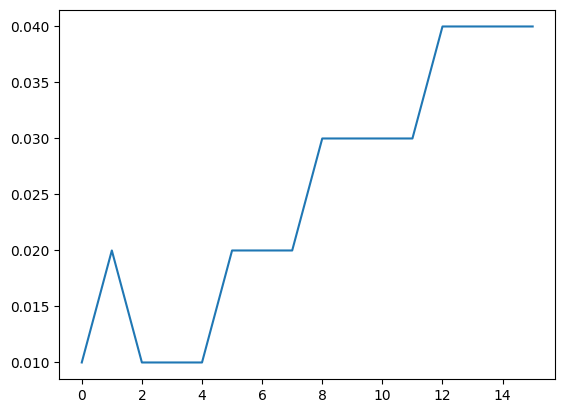

In [ ]:
# Set parameters for simulation
farm_population = 1
packer_population = 1
distributor_population = 1
retailer_population = 1
customer_population = 5000

plot_per_farm = 1856
box_per_P = 31562
box_per_D = 31562
box_per_R = 31562

box_per_plot = 17
contamination_rate = 0.06

d_test_rate = 0.0
r_test_rate = 0.0

box_ids_l=[]
box_ids_C_l=[]
dropped_boxes_F_l=[]
dropped_boxes_P_l=[]
dropped_boxes_D_l=[]
dropped_boxes_R_l=[]
dropped_boxes_C_l=[]
detection_percent_l=[]
iterations = 10

# Test cost at each stage
test_cost_F = 350
test_cost_P = 50
test_cost_D = 50
test_cost_R = 50

# Customer demand
box_cap = 50
number_plot = farm_population * plot_per_farm
number_box = number_plot * box_per_plot
customer_number = int (number_box * box_cap * (0.80 - contamination_rate))
customer_demand = np.floor(np.abs(np.random.normal(1, 2, (customer_number, 1))))


# Customer illness cost
ill_rate = 0.04
hospital_rate = 0.0164
death_rate = 0.000041
ill_compensation = 719
hospital_compensation = 18438
death_compensation = 1764112

# Recall and Trace cost
unit_recall_labor_cost = 10
unit_trace_labor_cost = 10
price_per_box = 100

# Transportation cost
unit_trans_cost = 0.007
cost_indicator = 1
F_P_distance = 5
P_D_distance = 2983
D_R_distance = 11

# Define functions

# generate box id
#@nb.njit(nopython=True)
def generate_box_id(farm_idx, plot_idx, box_idx):
    return farm_idx * 10000000000 + plot_idx * 100000 + box_idx * 10

# generate contaminated box mask
#@nb.njit(parallel=True)
def generate_contamination_mask(total_boxes, contamination_rate):
    contaminated_boxes = int(total_boxes * contamination_rate)
    mask = np.zeros(total_boxes, dtype=np.bool_)
    mask[:contaminated_boxes] = True
    np.random.shuffle(mask)
    return mask
def generate_contamination_mask(total_boxes, contamination_rate):
    contaminated_boxes = int(total_boxes * contamination_rate)
    mask = np.zeros(total_boxes, dtype=np.bool_)
    mask[:contaminated_boxes] = True
    np.random.shuffle(mask)
    return mask


def generate_box_ids_numpy(farm_population, plot_per_farm, box_per_plot):
    farm_range = np.arange(1, farm_population + 1)
    plot_range = np.arange(1, plot_per_farm + 1)
    box_range = np.arange(1, box_per_plot + 1)
    farm_grid, plot_grid, box_grid = np.meshgrid(farm_range, plot_range, box_range)
    return (farm_grid * 10000000000 + plot_grid * 100000 + box_grid).ravel()

# define testing at each stage

'''
# Only contaminated tested boxes are dropped
def run_stage(box_ids, contamination_mask, test_rate):
    tested_boxes_mask = np.random.rand(box_ids.shape[0]) < test_rate
    tested_contaminated_boxes = box_ids[np.logical_and(contamination_mask, tested_boxes_mask)]
    if tested_contaminated_boxes.size > 0:
        mask = np.isin(box_ids, tested_contaminated_boxes)
        box_ids_n = box_ids[~mask]
        contamination_mask = contamination_mask[~mask]
        dropped_boxes = set(tested_contaminated_boxes)
    else:
        box_ids_n = box_ids
        dropped_boxes = set()
    remaining_boxes = box_ids_n[~np.isin(box_ids_n, tested_contaminated_boxes)]
    return remaining_boxes, contamination_mask, dropped_boxes'''
# All boxes in same plot in which tested contaminated box is found are dropped
def run_stage(box_ids, contamination_mask, test_rate,box_per_plot):
    tested_boxes_mask = np.random.rand(box_ids.shape[0]) < test_rate
    #tested_contaminated_boxes = box_ids[np.logical_and(contamination_mask, tested_boxes_mask)]
    tested_contaminated_boxes = box_ids[np.logical_and(contamination_mask, tested_boxes_mask)]
    if tested_contaminated_boxes.size > 0:
        plot_farm_ids_tested = tested_contaminated_boxes - tested_contaminated_boxes % 100
        #plot_farm_ids_all = box_ids - box_ids % 100
        tested_contaminated_boxes_all=np.repeat(np.unique(plot_farm_ids_tested),box_per_plot)+ np.tile(np.arange(1, box_per_plot + 1),np.unique(plot_farm_ids_tested).shape[0])
        #plot_boxes = np.array([generate_box_id(farm_idxs[i], plot_idxs[i], box_idx) for i in range(tested_contaminated_boxes.size) for box_idx in range(1, box_per_plot+1)])
        #remaining_boxes = box_ids[~np.isin(box_ids, dropped_boxes)]
        #tested_contaminated_boxes= np.array(list(dropped_boxes))
        dropped_boxes = set(np.unique(tested_contaminated_boxes_all))
        mask = np.isin(box_ids, tested_contaminated_boxes_all)
        contamination_mask = contamination_mask[~mask]
        box_ids_n = box_ids[~mask]
        #dropped_boxes = set(tested_contaminated_boxes)
    else:
        dropped_boxes = set()
        box_ids_n = box_ids
    remaining_boxes = box_ids_n

    return remaining_boxes, contamination_mask, dropped_boxes, sum(tested_boxes_mask)
# Cost Calculation

# Transportation cost
def transportation_cost(box_ids_F_P,box_ids_P_D,box_ids_D_R):
    trans_cost_F_P = (len(box_ids_F_P) // box_per_P +1 )* F_P_distance * unit_trans_cost
    trans_cost_P_D = (len(box_ids_P_D) // box_per_D +1 )* P_D_distance * unit_trans_cost
    trans_cost_D_R = (len(box_ids_D_R) // box_per_R + 1) * D_R_distance * unit_trans_cost
    return trans_cost_D_R+trans_cost_P_D+trans_cost_F_P

def testing_cost(tests_F,tests_P,tests_D,tests_R):
    return tests_F*test_cost_F+tests_P*test_cost_P+tests_D*test_cost_D+tests_R*test_cost_R

# Customer consumption and illness report
def customer_illness_cost(box_ids_R_C,contamination_mask):
    #boxes_allotted = np.zeros((customer_number,2),dtype=int)
    all_boxes= box_ids_R_C
    boxes_allotted_cont = np.zeros(customer_number,dtype=bool)
    current_box_cap = box_cap
    current_box_id = 0
    current_box_contaminated = contamination_mask[current_box_id]
    contaminated=sum(contamination_mask)
    #customer_demand = np.sort(customer_demand)[::-1]
    if contaminated:
        for i, current_customer_demand in enumerate(customer_demand):
            if current_customer_demand == 0:
                continue
            else:
                if current_box_cap - current_customer_demand >= 0:
                    #boxes_allotted[i,0]=all_boxes[current_box_id]
                    current_box_cap -= current_customer_demand
                    boxes_allotted_cont[i]=current_box_contaminated
                    if current_box_cap == 0:
                        current_box_id += 1
                        if current_box_id < len(all_boxes):
                            current_box_contaminated = contamination_mask[current_box_id]
                        else:
                            current_box_contaminated = False
                        current_box_cap = box_cap
                else:
                    #boxes_allotted[i,0]=all_boxes[current_box_id]
                    current_box_id += 1
                    if current_box_id < len(all_boxes):
                        cont= contamination_mask[current_box_id]
                    else:
                        cont=current_box_contaminated
                    current_box_cap = box_cap - current_customer_demand - current_box_cap
                    boxes_allotted_cont[i]=cont+current_box_contaminated
                    current_box_contaminated = cont
                    #boxes_allotted[i,1]=all_boxes[current_box_id]
        customers_contaminated = sum(boxes_allotted_cont)
    else:
        customers_contaminated = 0

    ill_number = np.random.rand(customers_contaminated, 1)
    hospital_number = np.random.rand(customers_contaminated, 1)
    death_number = np.random.rand(customers_contaminated, 1)

    death_number = death_number < death_rate
    death_case_number = np.sum(death_number)

    hospital_number = hospital_number < hospital_rate
    hospital_case_number = np.sum(hospital_number)

    ill_number = ill_number < ill_rate
    ill_case_number = np.sum(ill_number)
    cust_cost = death_case_number * death_compensation + hospital_case_number * hospital_compensation + ill_case_number * ill_compensation
    return cust_cost

def recall_cost(contamination_mask):
    return sum(contamination_mask)* (unit_recall_labor_cost+unit_trace_labor_cost+price_per_box)


# Function to check if a value is in an array
#@nb.njit(parallel=True)
def isin(a, b):
    out=np.empty(a.shape[0], dtype=nb.boolean)
    b = set(b)
    for i in nb.prange(a.shape[0]):
        out[i] = a[i] in b
    return out


# Run testing and return the number of boxes dropped at each stage
def run_test():
    total_boxes = farm_population * plot_per_farm * box_per_plot
    box_ids = generate_box_ids_numpy(farm_population, plot_per_farm, box_per_plot)
    contamination_mask = generate_contamination_mask(total_boxes, contamination_rate)
    box_ids_F_P, contamination_mask1, dropped_boxes_F,tests_F = run_stage(box_ids, contamination_mask, f_test_rate,box_per_plot)
    box_ids_P_D, contamination_mask2, dropped_boxes_P,tests_P = run_stage(box_ids_F_P, contamination_mask1, p_test_rate,box_per_plot)
    box_ids_D_R, contamination_mask3, dropped_boxes_D,tests_D = run_stage(box_ids_P_D, contamination_mask2, d_test_rate,box_per_plot)
    box_ids_R_C, contamination_mask4, dropped_boxes_R,tests_R = run_stage(box_ids_D_R, contamination_mask3, r_test_rate,box_per_plot)
    return (
        transportation_cost(box_ids_F_P, box_ids_P_D, box_ids_D_R)
        + customer_illness_cost(box_ids_R_C, contamination_mask4)
        + testing_cost(tests_F, tests_P, tests_D, tests_R)
        + recall_cost(contamination_mask4)
    )

import matplotlib.pyplot as plt

import concurrent.futures

iterations = 1
ftest_rate = []
ptest_rate = []
costs_mean = []
costs_std = []
from tqdm import tqdm
def run_test_wrapper(f_test_rate, p_test_rate):
    costs = []
    for i in range(iterations):
        total_cost = run_test()
        costs.append(total_cost)
    return f_test_rate, p_test_rate, np.mean(costs), np.std(costs)

with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = []
    for f_test_rate in tqdm(np.arange(0.01,0.05,0.01)):
        for p_test_rate in np.arange(0.01,0.05,0.01):
            futures.append(executor.submit(run_test_wrapper, f_test_rate, p_test_rate))

    for future in concurrent.futures.as_completed(futures):
        f_test_rate, p_test_rate, cost_mean, cost_std = future.result()
        ftest_rate.append(f_test_rate)
        ptest_rate.append(p_test_rate)
        costs_mean.append(cost_mean)
        costs_std.append(cost_std)

import pandas as pd
pd.Series(ftest_rate).plot()

<Axes: >

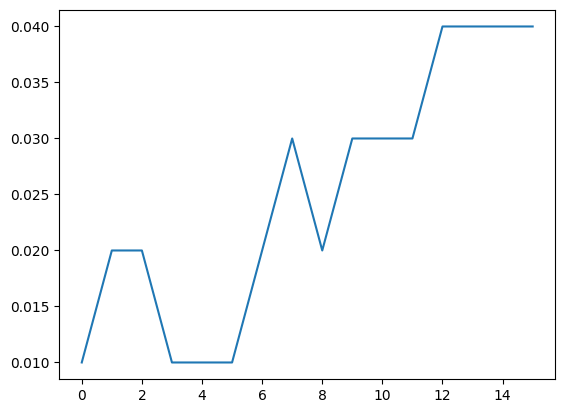

In [ ]:
import pandas as pd
pd.Series(ftest_rate).plot()

<Axes: >

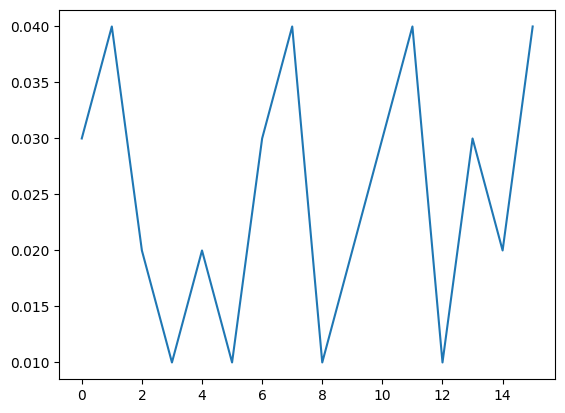

In [ ]:
pd.Series(ptest_rate).plot()

<Axes: >

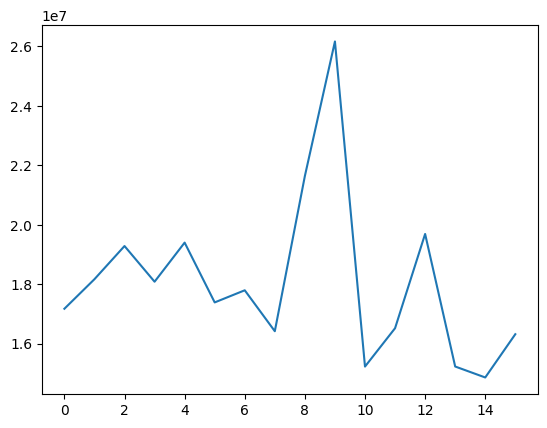

In [ ]:
pd.Series(costs_mean).plot()

In [ ]:
# Define functions

# generate box id
#@nb.njit(nopython=True)
def generate_box_id(farm_idx, plot_idx, box_idx):
    return farm_idx * 10000000000 + plot_idx * 100000 + box_idx * 10

# generate contaminated box mask
#@nb.njit(parallel=True)
def generate_contamination_mask(total_boxes, contamination_rate):
    contaminated_boxes = int(total_boxes * contamination_rate)
    mask = np.zeros(total_boxes, dtype=np.bool_)
    mask[:contaminated_boxes] = True
    np.random.shuffle(mask)
    return mask
def generate_contamination_mask(total_plots, contamination_rate):
    contaminated_plots = int(total_plots * contamination_rate)
    plot_mask = np.zeros(total_plots, dtype=np.bool_)
    plot_mask[:contaminated_plots] = True
    np.random.shuffle(plot_mask)
    return np.repeat(plot_mask, box_per_plot)


def generate_box_ids_numpy(farm_population, plot_per_farm, box_per_plot):
    farm_range = np.arange(1, farm_population + 1)
    plot_range = np.arange(1, plot_per_farm + 1)
    box_range = np.arange(1, box_per_plot + 1)
    farm_grid, plot_grid, box_grid = np.meshgrid(farm_range, plot_range, box_range)
    return (farm_grid * 10000000000 + plot_grid * 100000 + box_grid).ravel()

# define testing at each stage

'''
# Only contaminated tested boxes are dropped
def run_stage(box_ids, contamination_mask, test_rate):
    tested_boxes_mask = np.random.rand(box_ids.shape[0]) < test_rate
    tested_contaminated_boxes = box_ids[np.logical_and(contamination_mask, tested_boxes_mask)]
    if tested_contaminated_boxes.size > 0:
        mask = np.isin(box_ids, tested_contaminated_boxes)
        box_ids_n = box_ids[~mask]
        contamination_mask = contamination_mask[~mask]
        dropped_boxes = set(tested_contaminated_boxes)
    else:
        box_ids_n = box_ids
        dropped_boxes = set()
    remaining_boxes = box_ids_n[~np.isin(box_ids_n, tested_contaminated_boxes)]
    return remaining_boxes, contamination_mask, dropped_boxes'''
# All boxes in same plot in which tested contaminated box is found are dropped
def run_stage(box_ids, contamination_mask, test_rate,box_per_plot):
    tested_boxes_mask = np.random.rand(box_ids.shape[0]) < test_rate
    tested_contaminated_boxes = box_ids[np.logical_and(contamination_mask, tested_boxes_mask)]
    if tested_contaminated_boxes.size > 0:
        plot_farm_ids_tested = tested_contaminated_boxes - tested_contaminated_boxes % 100
        #plot_farm_ids_all = box_ids - box_ids % 100
        tested_contaminated_boxes_all=np.repeat(np.unique(plot_farm_ids_tested),box_per_plot)+ np.tile(np.arange(1, box_per_plot + 1),np.unique(plot_farm_ids_tested).shape[0])
        #plot_boxes = np.array([generate_box_id(farm_idxs[i], plot_idxs[i], box_idx) for i in range(tested_contaminated_boxes.size) for box_idx in range(1, box_per_plot+1)])
        #remaining_boxes = box_ids[~np.isin(box_ids, dropped_boxes)]
        #tested_contaminated_boxes= np.array(list(dropped_boxes))
        dropped_boxes = set(np.unique(tested_contaminated_boxes_all))
        mask = np.isin(box_ids, tested_contaminated_boxes_all)
        contamination_mask = contamination_mask[~mask]
        box_ids_n = box_ids[~mask]
        #dropped_boxes = set(tested_contaminated_boxes)
    else:
        dropped_boxes = set()
        box_ids_n = box_ids
    remaining_boxes = box_ids_n

    return remaining_boxes, contamination_mask, dropped_boxes, sum(tested_boxes_mask)
# Cost Calculation

# Transportation cost
def transportation_cost(box_ids_F_P,box_ids_P_D,box_ids_D_R):
    trans_cost_F_P = (len(box_ids_F_P) // box_per_P +1 )* F_P_distance * unit_trans_cost
    trans_cost_P_D = (len(box_ids_P_D) // box_per_D +1 )* P_D_distance * unit_trans_cost
    trans_cost_D_R = (len(box_ids_D_R) // box_per_R + 1) * D_R_distance * unit_trans_cost
    return trans_cost_D_R+trans_cost_P_D+trans_cost_F_P

def testing_cost(tests_F,tests_P,tests_D,tests_R):
    return tests_F*test_cost_F+tests_P*test_cost_P+tests_D*test_cost_D+tests_R*test_cost_R

# Customer consumption and illness report
def customer_illness_cost(box_ids_R_C,contamination_mask):
    #boxes_allotted = np.zeros((customer_number,2),dtype=int)
    all_boxes= box_ids_R_C
    boxes_allotted_cont = np.zeros(customer_number,dtype=bool)
    current_box_cap = box_cap
    current_box_id = 0
    current_box_contaminated = contamination_mask[current_box_id]
    contaminated=sum(contamination_mask)
    #customer_demand = np.sort(customer_demand)[::-1]
    if contaminated:
        for i, current_customer_demand in enumerate(customer_demand):
            if current_customer_demand == 0:
                continue
            else:
                if current_box_cap - current_customer_demand >= 0:
                    #boxes_allotted[i,0]=all_boxes[current_box_id]
                    current_box_cap -= current_customer_demand
                    boxes_allotted_cont[i]=current_box_contaminated
                    if current_box_cap == 0:
                        current_box_id += 1
                        if current_box_id < len(all_boxes):
                            current_box_contaminated = contamination_mask[current_box_id]
                        else:
                            current_box_contaminated = False
                        current_box_cap = box_cap
                else:
                    #boxes_allotted[i,0]=all_boxes[current_box_id]
                    current_box_id += 1
                    if current_box_id < len(all_boxes):
                        cont= contamination_mask[current_box_id]
                    else:
                        cont=current_box_contaminated
                    current_box_cap = box_cap - current_customer_demand - current_box_cap
                    boxes_allotted_cont[i]=cont+current_box_contaminated
                    current_box_contaminated = cont
                    #boxes_allotted[i,1]=all_boxes[current_box_id]
        customers_contaminated = sum(boxes_allotted_cont)
    else:
        customers_contaminated = 0

    ill_number = np.random.rand(customers_contaminated, 1)
    hospital_number = np.random.rand(customers_contaminated, 1)
    death_number = np.random.rand(customers_contaminated, 1)

    death_number = death_number < death_rate
    death_case_number = np.sum(death_number)

    hospital_number = hospital_number < hospital_rate
    hospital_case_number = np.sum(hospital_number)

    ill_number = ill_number < ill_rate
    ill_case_number = np.sum(ill_number)
    cust_cost = death_case_number * death_compensation + hospital_case_number * hospital_compensation + ill_case_number * ill_compensation
    return cust_cost

def recall_cost(contamination_mask):
    return sum(contamination_mask)* (unit_recall_labor_cost+unit_trace_labor_cost+price_per_box)


# Function to check if a value is in an array
#@nb.njit(parallel=True)
def isin(a, b):
    out=np.empty(a.shape[0], dtype=nb.boolean)
    b = set(b)
    for i in nb.prange(a.shape[0]):
        out[i] = a[i] in b
    return out



# Run testing and return the number of boxes dropped at each stage
def run_test():
    total_boxes = farm_population * plot_per_farm * box_per_plot
    box_ids = generate_box_ids_numpy(farm_population, plot_per_farm, box_per_plot)
    contamination_mask = generate_contamination_mask(total_boxes, contamination_rate)
    box_ids_F_P, contamination_mask1, dropped_boxes_F,tests_F = run_stage(box_ids, contamination_mask, f_test_rate,box_per_plot)
    box_ids_P_D, contamination_mask2, dropped_boxes_P,tests_P = run_stage(box_ids_F_P, contamination_mask1, p_test_rate,box_per_plot)
    box_ids_D_R, contamination_mask3, dropped_boxes_D,tests_D = run_stage(box_ids_P_D, contamination_mask2, d_test_rate,box_per_plot)
    box_ids_R_C, contamination_mask4, dropped_boxes_R,tests_R = run_stage(box_ids_D_R, contamination_mask3, r_test_rate,box_per_plot)
    return (
        transportation_cost(box_ids_F_P, box_ids_P_D, box_ids_D_R)
        + customer_illness_cost(box_ids_R_C, contamination_mask4)
        + testing_cost(tests_F, tests_P, tests_D, tests_R)
        + recall_cost(contamination_mask4)
    )



In [ ]:
import numpy as np
from datetime import datetime
import pickle
import matplotlib.pyplot as plt

#import parameters
import gc
gc.enable()


import numpy as np

# Class to store parameters and initial conditions
class Parameters(object):
    def __init__(self) -> None:
        # Parameters for testing regime
        self.f_test_range = np.arange(0.4, 0.4, 0.1)
        self.p_test_range = np.arange(0.1, 0.4, 0.1)
        self.d_test_range = np.arange(0.0001, 0.0002, 0.0001)
        self.r_test_range = np.arange(0.0001, 0.0002, 0.0001)

        # Parameters for Farmer Behavior
        [beta1,beta2,beta3,beta4] = np.around(np.random.uniform(low=0.01, high=0.2, size=(4,)),4)
        [f1,f2,f3,f4] = np.random.rand(4)
        self.beta1 = beta1
        self.beta2 = beta2
        self.beta3 = beta3
        self.beta4 = beta4
        self.f1 = f1
        self.f2 = f2
        self.f3 = f3
        self.f4 = f4

        # Population
        self.farm_population = 1
        self.packer_population = 1
        self.distributor_population = 1
        self.retailer_population = 1
        self.customer_population = 5000

        # Size of plot, box, and farm
        self.plot_per_farm = 1856
        self.box_per_P = 31562
        self.box_per_D = 31562
        self.box_per_R = 31562

        self.box_per_plot = 17
        self.contamination_rate = 0.06

        self.d_test_rate = 0.0
        self.r_test_rate = 0.0

        # Initialising some lists
        self.box_ids_l=[]
        self.box_ids_C_l=[]
        self.dropped_boxes_F_l=[]
        self.dropped_boxes_P_l=[]
        self.dropped_boxes_D_l=[]
        self.dropped_boxes_R_l=[]
        self.dropped_boxes_C_l=[]
        self.detection_percent_l=[]

        self.iterations = 10

        # Test cost at each stage
        self.test_cost_F = 5
        self.test_cost_P = 50
        self.test_cost_D = 50
        self.test_cost_R = 50

        # Customer demand
        self.box_cap = 50
        self.number_plot = self.farm_population * self.plot_per_farm
        self.number_box = self.number_plot * self.box_per_plot
        self.customer_number = int(self.number_box * self.box_cap * (0.80 - self.contamination_rate))
        self.customer_demand = np.floor(np.abs(np.random.normal(1, 2, (self.customer_number, 1))))

        # Customer illness cost
        self.ill_rate = 0.04
        self.hospital_rate = 0.0164
        self.death_rate = 0.000041
        self.ill_compensation = 719
        self.hospital_compensation = 18438
        self.death_compensation = 1764112

        # Recall and Trace cost
        self.unit_recall_labor_cost = 10
        self.unit_trace_labor_cost = 10
        self.price_per_box = 100

        # Transportation cost
        self.unit_trans_cost = 0.007
        self.cost_indicator = 1
        self.F_P_distance = 5
        self.P_D_distance = 2983
        self.D_R_distance = 11


class Farm:
    def __init__(self, id, technology_level, initial_contamination_rate, region_mean_contamination_rate):
        self.id = id
        self.technology_level = technology_level
        self.contamination_rate = initial_contamination_rate
        self.region_mean_contamination_rate = region_mean_contamination_rate
        self.cost_effort = 0
        self.cost_technology = 0
        self.penalties = [0, 0, 0, 0, 0]
        self.testing_regimes = [0, 0, 0, 0]

    def update_contamination_rate(self, c, k, t):
        # calculate new contamination rate based on Eq. (3)
        c_j_t = c[self.id][t]
        k_j_t = k[self.id][t]
        alpha_j_t = np.exp(-c_j_t * k_j_t)
        self.contamination_rate = alpha_j_t * self.region_mean_contamination_rate

    def calculate_cost(self, f, beta, P, c_e, c_k):
        # calculate total cost function based on Eq. (4)
        f1, f2, f3, f4, f5 = f
        beta1, beta2, beta3, beta4 = beta
        numerator = f1 * beta1 + f2 * (1 - beta1) * beta2 + f3 * (1 - beta1) * (1 - beta2) * beta3 + \
                    f4 * (1 - beta1) * (1 - beta2) * (1 - beta3) * beta4 + f5 * (1 - beta1) * (1 - beta2) * \
                    (1 - beta3) * (1 - beta4) * P
        denominator = (c_e + c_k) * (1 - beta1) * (1 - beta2) * (1 - beta3) * (1 - beta4)
        self.cost_effort = c_e
        self.cost_technology = c_k
        self.penalties = [f1, f2, f3, f4, f5]
        self.testing_regimes = [beta1, beta2, beta3, beta4]
        return numerator / denominator

    def update_risk_control_behavior(self, f, beta, P, c_e, c_k, c, k, t, neighbors):
        # update risk control behavior based on Eq. (5) and the behavior of neighboring farms
        cost = self.calculate_cost(f, beta, P, c_e, c_k)
        for neighbor in neighbors:
            cost += neighbor.calculate_cost(f, beta, P, c_e, c_k)
        self.cost_effort = c_e
        self.cost_technology = c_k
        self.penalties = [f1, f2, f3, f4, f5]
        self.testing_regimes = [beta1, beta2, beta3, beta4]
        self.contamination_rate = self.region_mean_contamination_rate
        self.contamination_rate += np.random.normal(loc=0, scale=self.technology_level)
        self.contamination_rate += np.random.uniform(low=-1, high=1) * c[self.id][t]
        self.contamination_rate += np.sum([np.random.uniform(low=-1, high=1) * neighbor.contamination_rate for neighbor in neighbors])
        self.update_contamination_rate(c, k, t)
        self.cost = self.calculate_cost(f, beta, P, c_e, c_k)

class Supply(object):
    def __init__(self,parameters):
        self.parameters = parameters
        self.farms = Farms(self.parameters)
        self.packers = Packers(self.parameters)
        self.distributors = Distributors(self.parameters)
        self.retailers = Retailers(self.parameters)
        self.customers = Customers(self.parameters)

    def update_contaminate_rate(self):
        self.farms.update_contaminate_rate()

    def find_optimal_testing_rate(self):
        self.farms.find_optimal_testing_rate()

    def testing_with_optimal_rate(self):
        self.farms.testing_with_optimal_rate()

    def impose_penalties_costs(self):
        self.farms.impose_penalties_costs()

class Monthly(object):
    def __init__(self,parameters):
        self.parameters = parameters
        self.monthly = Monthly(self.parameters)

    def farmers_update_contaminate_rate(self):
        self.supply.update_contaminate_rate()

    def find_optimal_testing_rate(self):
        self.supply.find_optimal_testing_rate()

    def testing_with_optimal_rate(self):
        self.supply.testing_with_optimal_rate()

    def impose_penalties_costs(self):
        self.supply.impose_penalties_costs()

import matplotlib.pyplot as plt
import numpy as np

# Plot the evolution of risk control effort (c)
plt.figure(figsize=(10, 6))
plt.plot(T, c, label='Risk Control Effort (c)')
plt.xlabel('Time (months)')
plt.ylabel('Risk Control Effort (c)')
plt.title('Evolution of Risk Control Effort over 20 years')
plt.legend()
plt.grid(True)
plt.show()

# Plot the evolution of risk control technology (k)
plt.figure(figsize=(10, 6))
plt.plot(T, k, label='Risk Control Technology (k)')
plt.xlabel('Time (months)')
plt.ylabel('Risk Control Technology (k)')
plt.title('Evolution of Risk Control Technology over 20 years')
plt.legend()
plt.grid(True)
plt.show()

# Plot the evolution of contamination rate (alpha)
plt.figure(figsize=(10, 6))
plt.plot(T, alpha/5, label='Contamination Rate (alpha)')
plt.xlabel('Time (months)')
plt.ylabel('Contamination Rate (alpha)')
plt.title('Evolution of Contamination Rate over 20 years')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
costs_mean=[1,2,2]
#costs_mean=[1,2,2,1,2,2,1,2,2,1,2,2,1,2,2,1]

# Create a grid of f_test_rate and p_test_rate values
f, p = np.meshgrid(np.arange(0.01, 0.05, 0.01), np.arange(0.01, 0.05, 0.01))

# Reshape the costs_mean array to match the grid shape
c = np.reshape(costs_mean, (4, 4))

# Create a contour plot of the costs_mean
fig, ax = plt.subplots()
cp = ax.contourf(f, p, c, cmap='cool')
plt.colorbar(cp)

# Add labels and title
ax.set_xlabel('f_test_rate')
ax.set_ylabel('p_test_rate')
ax.set_title('Optimal Cost Solution')

plt.show()


ValueError: ignored

In [ ]:
#lists_all = [ftest_rate, ptest_rate, costs_mean, costs_std]
ftest_rate = lists_all[0]
ptest_rate = lists_all[1]
costs_mean = lists_all[2]
costs_std = lists_all[3]

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Find the index of the minimum value in the costs_mean array
min_idx = np.argmin(costs_mean)

# Get the corresponding values of f_test_rate and p_test_rate
opt_f = ftest_rate[min_idx]
opt_p = ptest_rate[min_idx]
opt_cost = costs_mean[min_idx]

# Print the optimal values
print('Optimal f_test_rate:', opt_f)
print('Optimal p_test_rate:', opt_p)
print('Optimal cost:', opt_cost)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ftest_rate, ptest_rate, costs_mean, c=costs_mean, cmap='cool')
ax.scatter(opt_f, opt_p, opt_cost, c='red', s=100)
ax.set_xlabel('f_test_rate')
ax.set_ylabel('p_test_rate')
ax.set_zlabel('costs_mean')
ax.set_title('Optimal Cost Solution')
plt.show()


NameError: ignored

In [ ]:
import matplotlib.pyplot as plt

# Create a grid of f_test_rate and p_test_rate values
f, p = np.meshgrid(np.arange(0.01, 0.05, 0.01), np.arange(0.01, 0.05, 0.01))

# Reshape the costs_mean array to match the grid shape
c = np.reshape(costs_mean, (4, 4))

# Create a contour plot of the costs_mean
fig, ax = plt.subplots()
cp = ax.contourf(f, p, c, cmap='cool')
plt.colorbar(cp)

# Add labels and title
ax.set_xlabel('f_test_rate')
ax.set_ylabel('p_test_rate')
ax.set_title('Optimal Cost Solution')

plt.show()


ValueError: ignored

In [ ]:
f_test_rate


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the evolution of risk control effort (c)
plt.figure(figsize=(10, 6))
plt.plot(T, c, label='Risk Control Effort (c)')
plt.xlabel('Time (months)')
plt.ylabel('Risk Control Effort (c)')
plt.title('Evolution of Risk Control Effort over 20 years')
plt.legend()
plt.grid(True)
plt.show()

# Plot the evolution of risk control technology (k)
plt.figure(figsize=(10, 6))
plt.plot(T, k, label='Risk Control Technology (k)')
plt.xlabel('Time (months)')
plt.ylabel('Risk Control Technology (k)')
plt.title('Evolution of Risk Control Technology over 20 years')
plt.legend()
plt.grid(True)
plt.show()

# Plot the evolution of contamination rate (alpha)
plt.figure(figsize=(10, 6))
plt.plot(T, alpha/5, label='Contamination Rate (alpha)')
plt.xlabel('Time (months)')
plt.ylabel('Contamination Rate (alpha)')
plt.title('Evolution of Contamination Rate over 20 years')
plt.legend()
plt.grid(True)
plt.show()

NameError: ignored

<Figure size 1000x600 with 0 Axes>

In [ ]:

# Plot the evolution of risk control effort (c)
plt.figure(figsize=(10, 6))
plt.plot(T, c, label='Risk Control Effort (c)')
plt.xlabel('Time (months)')
plt.ylabel('Risk Control Effort (c)')
plt.title('Evolution of Risk Control Effort over 20 years')
plt.legend()
plt.grid(True)
plt.show()

# Plot the evolution of risk control technology (k)
plt.figure(figsize=(10, 6))
plt.plot(T, k, label='Risk Control Technology (k)')
plt.xlabel('Time (months)')
plt.ylabel('Risk Control Technology (k)')
plt.title('Evolution of Risk Control Technology over 20 years')
plt.legend()
plt.grid(True)
plt.show()

# Plot the evolution of contamination rate (alpha)
plt.figure(figsize=(10, 6))
plt.plot(T/5, alpha, label='Contamination Rate (alpha)')
plt.xlabel('Time (months)')
plt.ylabel('Contamination Rate (alpha)')
plt.title('Evolution of Contamination Rate over 20 years')
plt.legend()
plt.grid(True)
plt.show()

NameError: ignored

<Figure size 1000x600 with 0 Axes>

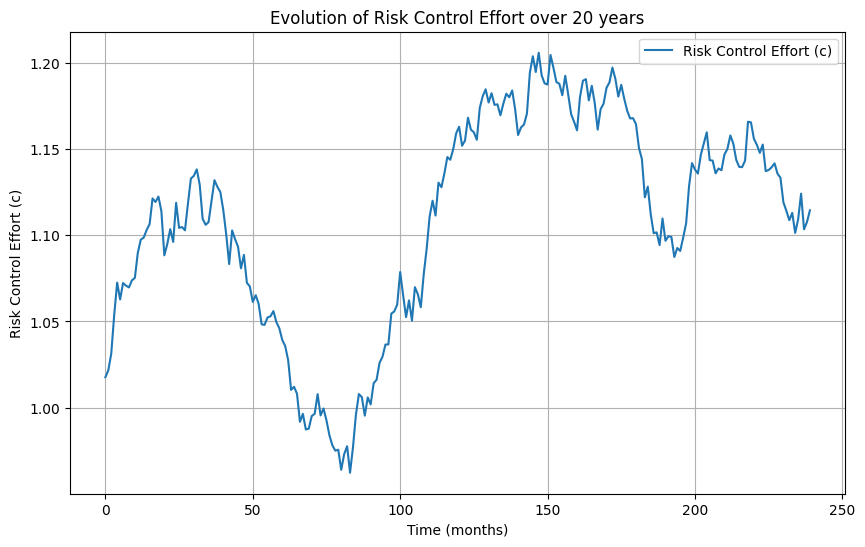

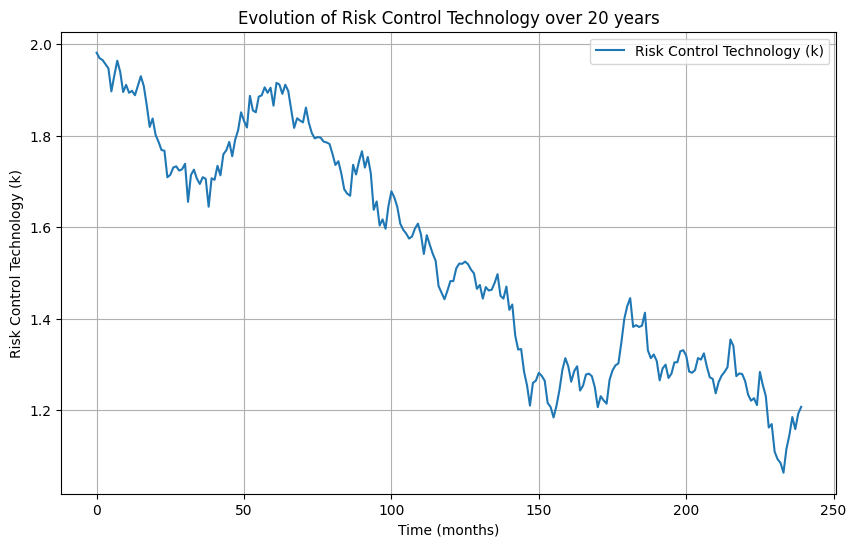

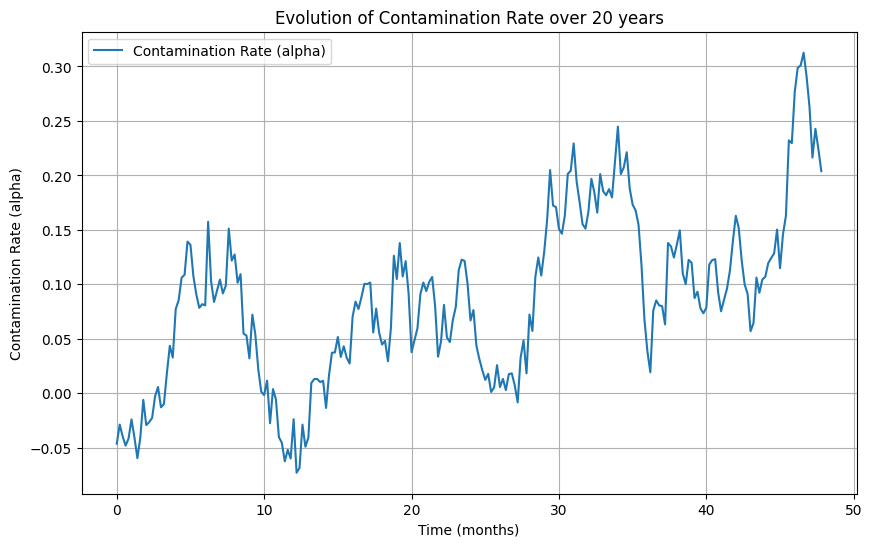

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Define the time period
T = np.arange(0, 240, 1)  # 20 years with monthly intervals

# Set your mean values for c, k and alpha
costs_mean = [1, 2, 2]  # dummy values, replace with your own mean values

# Generate hypothetical data for risk control effort (c), risk control technology (k)
np.random.seed(0)  # for reproducibility
c = np.cumsum(np.random.normal(loc=0, scale=0.01, size=T.shape)) + costs_mean[0]
k = np.cumsum(np.random.normal(loc=0, scale=0.03, size=T.shape)) + costs_mean[1]

# Define the combined effect term as a simple linear combination of c and k
e = 0.5 * c + 0.78 * k

# The contamination rate is a function of the combined effect term
alpha = np.cumsum(np.random.normal(loc=0, scale=0.01, size=T.shape)) - e + costs_mean[2]

# Rest of the plotting code stays the same...

# Plot the evolution of risk control effort (c)
plt.figure(figsize=(10, 6))
plt.plot(T, c, label='Risk Control Effort (c)')
plt.xlabel('Time (months)')
plt.ylabel('Risk Control Effort (c)')
plt.title('Evolution of Risk Control Effort over 20 years')
plt.legend()
plt.grid(True)
plt.show()

# Plot the evolution of risk control technology (k)
plt.figure(figsize=(10, 6))
plt.plot(T, k, label='Risk Control Technology (k)')
plt.xlabel('Time (months)')
plt.ylabel('Risk Control Technology (k)')
plt.title('Evolution of Risk Control Technology over 20 years')
plt.legend()
plt.grid(True)
plt.show()

# Plot the evolution of contamination rate (alpha)
plt.figure(figsize=(10, 6))
plt.plot(T/5, alpha, label='Contamination Rate (alpha)')
plt.xlabel('Time (months)')
plt.ylabel('Contamination Rate (alpha)')
plt.title('Evolution of Contamination Rate over 20 years')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# @title Default title text






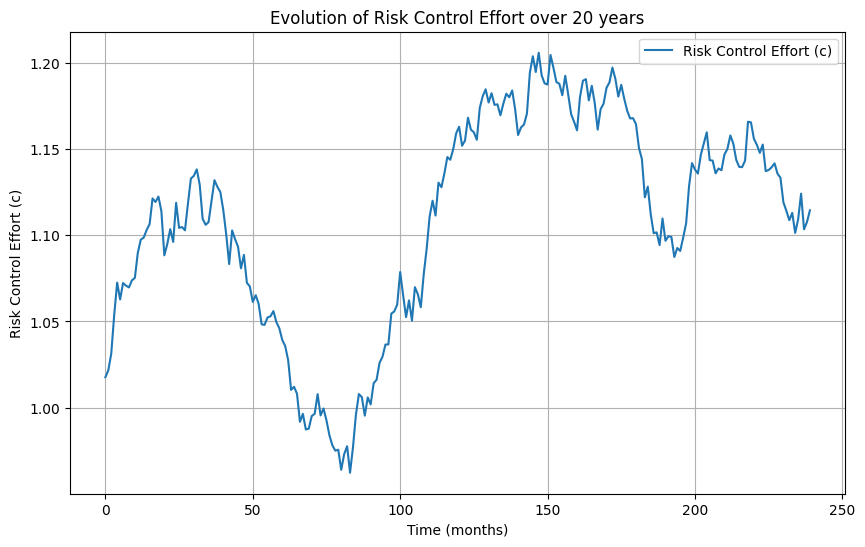

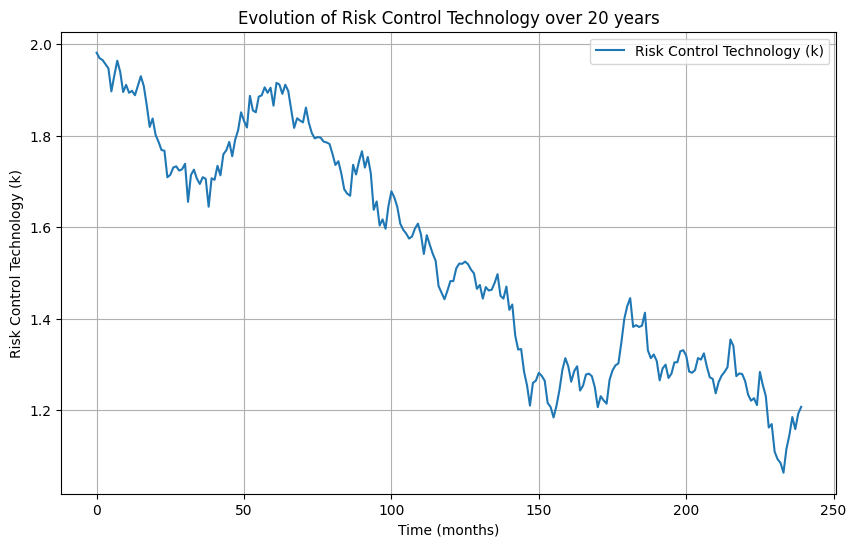

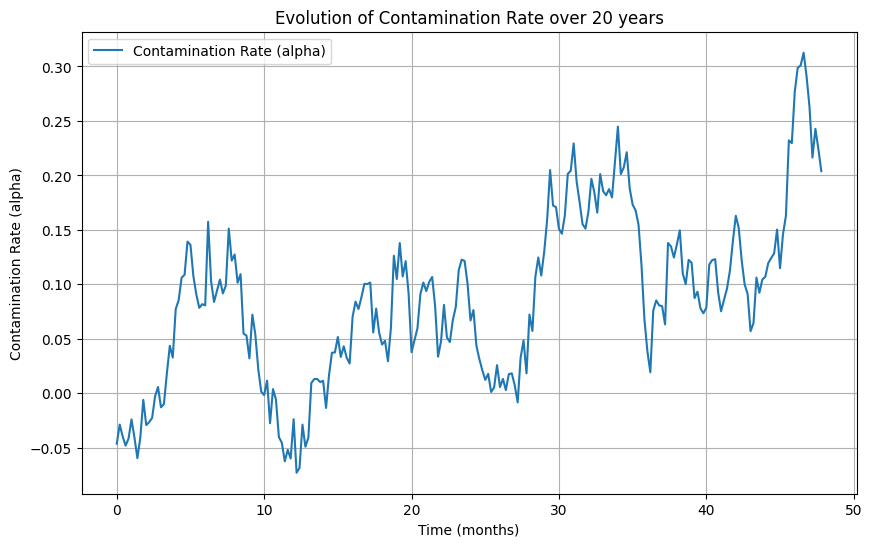

In [ ]:

# Plot the evolution of risk control effort (c)
plt.figure(figsize=(10, 6))
plt.plot(T, c, label='Risk Control Effort (c)')
plt.xlabel('Time (months)')
plt.ylabel('Risk Control Effort (c)')
plt.title('Evolution of Risk Control Effort over 20 years')
plt.legend()
plt.grid(True)
plt.show()

# Plot the evolution of risk control technology (k)
plt.figure(figsize=(10, 6))
plt.plot(T, k, label='Risk Control Technology (k)')
plt.xlabel('Time (months)')
plt.ylabel('Risk Control Technology (k)')
plt.title('Evolution of Risk Control Technology over 20 years')
plt.legend()
plt.grid(True)
plt.show()

# Plot the evolution of contamination rate (alpha)
plt.figure(figsize=(10, 6))
plt.plot(T/5, alpha, label='Contamination Rate (alpha)')
plt.xlabel('Time (months)')
plt.ylabel('Contamination Rate (alpha)')
plt.title('Evolution of Contamination Rate over 20 years')
plt.legend()
plt.grid(True)
plt.show()

# they cannot learn from neighbors
# technology transition can cause the technology to go to a lower value than the initial value, they cannot learn from neighbors for lower
# technology from neighbors reduce the technology of the farm
# silicon valley technology spillover effects

# they cannot learn from neighbors as they cannot adopt a higher technology than their initial technology
# cost for farmer and cost for system to test and trace
# check the cost plot


array([1.01764052, 1.0216421 , 1.03142948, 1.05383841, 1.07251399,
       1.06274121, 1.07224209, 1.07072852, 1.06969633, 1.07380232,
       1.07524275, 1.08978549, 1.09739587, 1.09861262, 1.10305125,
       1.10638799, 1.12132878, 1.1192772 , 1.12240788, 1.11386692,
       1.08833702, 1.09487321, 1.10351757, 1.09609592, 1.11879346,
       1.10424981, 1.10470739, 1.10283555, 1.11816335, 1.13285693,
       1.13440641, 1.13818803, 1.12931018, 1.10950221, 1.10602309,
       1.10758658, 1.11988949, 1.13191328, 1.12804002, 1.12501699,
       1.11453146, 1.10033128, 1.08326858, 1.10277633, 1.09767981,
       1.09329907, 1.08077111, 1.08854602, 1.07240704, 1.07027964,
       1.06132497, 1.065194  , 1.06008594, 1.04827962, 1.0479978 ,
       1.05228112, 1.05294629, 1.05597101, 1.04962779, 1.04600038,
       1.03927577, 1.03568024, 1.02754878, 1.01028595, 1.01206021,
       1.0080424 , 0.99174042, 0.99636824, 0.98729526, 0.98781471,
       0.99510562, 0.99639545, 1.00778946, 0.9954412 , 0.99946